<a href="https://colab.research.google.com/github/DuongDuyThoai/bai-tap-AI/blob/main/vnfood.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.utils import validation 
from sklearn import preprocessing
from keras.utils import to_categorical
from keras.models import load_model
from keras.utils import load_img, img_to_array
from keras.preprocessing.image import ImageDataGenerator

In [16]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [17]:
%cd /content/gdrive/MyDrive/Colab Notebooks/vnfood

/content/gdrive/MyDrive/Colab Notebooks/vnfood


In [18]:
train_datagen=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [19]:
training_set=train_datagen.flow_from_directory('/content/gdrive/MyDrive/Colab Notebooks/vnfood/Train',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 720 images belonging to 10 classes.


In [20]:
test_set = train_datagen.flow_from_directory('/content/gdrive/MyDrive/Colab Notebooks/vnfood/test',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 360 images belonging to 10 classes.


In [21]:
training_set.class_indices

{'Banh cuon': 0,
 'Banh mi': 1,
 'Banh pia': 2,
 'Banh tet': 3,
 'Banh xeo': 4,
 'Bun dau mam tom': 5,
 'Ca kho to': 6,
 'Com tam': 7,
 'Nem': 8,
 'Pho': 9}

In [22]:
test_set.class_indices

{'Banh cuon': 0,
 'Banh mi': 1,
 'Banh pia': 2,
 'Banh tet': 3,
 'Banh xeo': 4,
 'Bun dau mam tom': 5,
 'Ca kho to': 6,
 'Com tam': 7,
 'Nem': 8,
 'Pho': 9}

In [23]:
model=Sequential()

model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 150, 150, 32)      896       
                                                                 
 conv2d_13 (Conv2D)          (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 75, 75, 32)       0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 75, 75, 64)        18496     
                                                                 
 conv2d_15 (Conv2D)          (None, 75, 75, 64)        36928     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                  

In [25]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(training_set,epochs=100,batch_size=70,verbose=1)

Epoch 1/100
23/23 [==============================] - 352s 15s/step - loss: 2.1591 - accuracy: 0.1819
Epoch 2/100
23/23 [==============================] - 15s 671ms/step - loss: 1.7701 - accuracy: 0.3653
Epoch 3/100
23/23 [==============================] - 15s 639ms/step - loss: 1.4647 - accuracy: 0.4903
Epoch 4/100
23/23 [==============================] - 16s 713ms/step - loss: 1.3026 - accuracy: 0.5306
Epoch 5/100
23/23 [==============================] - 15s 656ms/step - loss: 1.2694 - accuracy: 0.5681
Epoch 6/100
23/23 [==============================] - 15s 645ms/step - loss: 1.1034 - accuracy: 0.6417
Epoch 7/100
23/23 [==============================] - 15s 659ms/step - loss: 0.9589 - accuracy: 0.6861
Epoch 8/100
23/23 [==============================] - 16s 719ms/step - loss: 0.9499 - accuracy: 0.6611
Epoch 9/100
23/23 [==============================] - 15s 625ms/step - loss: 0.9001 - accuracy: 0.7097
Epoch 10/100
23/23 [==============================] - 15s 659ms/step - loss: 0.6829

In [26]:
model.save('VNFOOD.h5')

In [27]:
model_food = load_model('VNFOOD.h5')

In [28]:
Score=model.evaluate(training_set,verbose=0)
print('Train Loss', Score[0])
print('Train Accuracy', Score[1])

Train Loss 0.005122834350913763
Train Accuracy 0.9986110925674438


1/1 [==============================] - 0s 14ms/step
Đây là : Banh mi


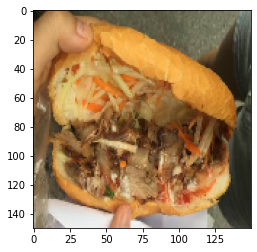

In [34]:
img = load_img('/content/113.jpg',target_size = (150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_food.predict(img)
class_food=['Banh cuon',
 'Banh mi',
 'Banh pia',
 'Banh tet',
 'Banh xeo',
 'Bun dau mam tom',
 'Ca kho to',
 'Com tam',
 'Nem',
 'Pho']
a= int(np.argmax(model.predict(img),axis=1))
print("Đây là :", class_food[a])

1/1 [==============================] - 0s 17ms/step
Đây là : Com tam


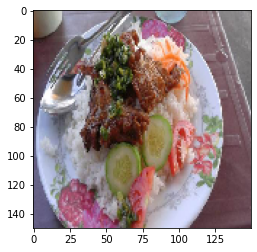

In [35]:
img = load_img('/content/147.jpg',target_size = (150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_food.predict(img)
class_food=['Banh cuon',
 'Banh mi',
 'Banh pia',
 'Banh tet',
 'Banh xeo',
 'Bun dau mam tom',
 'Ca kho to',
 'Com tam',
 'Nem',
 'Pho']
a= int(np.argmax(model.predict(img),axis=1))
print("Đây là :", class_food[a])